# **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas)

**Created by:**<br>
Vinícius Albano ([@vinialbano](https://github.com/vinialbano)) - CP3013677 <br>
Rodrigo Barros ([@rpbarros](https://github.com/rpbarros)) - CP3013502

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<span style='font-size: 2.5em'><b>Titanic - Machine Learning from Disaster 🚢</b></span><br/>
<span style='font-size: 1.5em'>Predict survival on the Titanic.</span>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/640px-RMS_Titanic_3.jpg">

---



## 0. Imports and default settings for plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 150)

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
plt.rcParams.update(params)

## 🔲 1. Frame the Problem

### 📄 1.1. Context

The sinking of the Titanic is one of the most infamous shipwrecks in history.

RMS Titanic was a British passenger liner operated by the White Star Line. Its construction took about two years and cost 7.5 million dollars. Considering nowdays currency, this value would be approximately [250 billion dolars](https://www.in2013dollars.com/us/inflation/1900?amount=7500000). It was designed to be the safest and most luxurious ship of its age, gaining a reputation for being "unsinkable."

The Titanic launched in 1911 at 269 meters long, 28 meters wide, and 53 meters high, being the largest ship afloat at the time. It operated with a crew of 892 people and could carry up to 2435 passengers (spread across the three available classes).

On April 15, 1912, during its maiden voyage, from Southampton, UK, to New York City, the Titanic sank after colliding with an iceberg. There were not enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

The sinking of the Titanic had as contributing factors natural causes (such as the climate) and human causes (neglect and overconfidence). Regardless of the reasons, the fact is that its wreckage killed fifteen hundreds of people.

Although those who escaped with their lives had their fair share of luck, some groups of people were more likely to escape death than others. For example, women, children and 1st class passengers. Thus, it may be some pattern that can be identified and extract from the raw data.

**References:** <br/>

[Titanic - Wikipedia](https://en.wikipedia.org/wiki/Titanic)

### 🧠 1.2. Challenge

#### 🎯 **Objective:**
**Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.** <br/>
The usage of this toy problem available on Kaggle allows to study and compare different classification algorithms and ML techniques.

#### **Baseline:**
Many competitors on Kaggle were able to perfectly predict all the passengers that survived. That is the benchmark for this study.

#### **Solution Planning:**
- **Classification problem**
- Metrics:
    - Accuracy
    - Precision
    - Recall
    - F1 Score
    - ROC Curve
    - AUC
- Data sources:
    - [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

## 💽 2. Get the Data

The considered dataset contains information of 1,309 passengers of the Titanic, including personal (e.g., `Name`, `Sex`, `Age`), and trip-related data (e.g., `Ticket`, `Fare`, `Cabin`). The dataset was previously split into train and test datasets, containing 891 and 418 observations each, respectivelly, where the first indicates if the passenger survived and the second doesn't.

This dataset does not have legal obligations and sensitive information.

### 2.1. Download the Data

Titanic dataset is available at this [Kaggle repository](https://www.kaggle.com/c/titanic).

### 2.2. Load the Data

In [2]:
import pandas as pd
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.3. Take a quick look at the data structure

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Each row corresponds to a passenger on Titanic that may have survived or not.

Each passenger is represented by **12 attributes** (5 numeric and 7 categorical).

* `PassengerId`: a unique identifier.
* `Survived`: Survival (0 = No, 1 = Yes) - ***only in the train dataset***.
* `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* `Name`: The name of the passenger.
* `Sex`: The sex of the passenger.
* `Age`: Age of the passenger in years.
* `SibSp`: Number of siblings / spouses aboard the Titanic.
* `Parch`: Number of parents / children aboard the Titanic.
* `Ticket`: Ticket number.
* `Fare`: Passenger fare.
* `Cabin`: Cabin number.
* `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

There are **891 instances** in the **train** dataset, with the following **missing features**:
* `Age` - missing in around 20% of the instances.
* `Cabin` - missing in around 77% of the instances.
* `Embarked` - missing 2 observations.

There are **418 instances** in the **test** dataset, with the following **missing features**:
* `Age` - missing in around 20% of the instances.
* `Cabin` - missing in around 78% of the instances.
* `Fare` - missing 1 observation. 

Since the **test** dataset should remain untouched, no information will be get from it.

In [6]:
# Fixing wrong data types
df_train['Survived'] = df_train['Survived'].astype('bool')

In [7]:
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


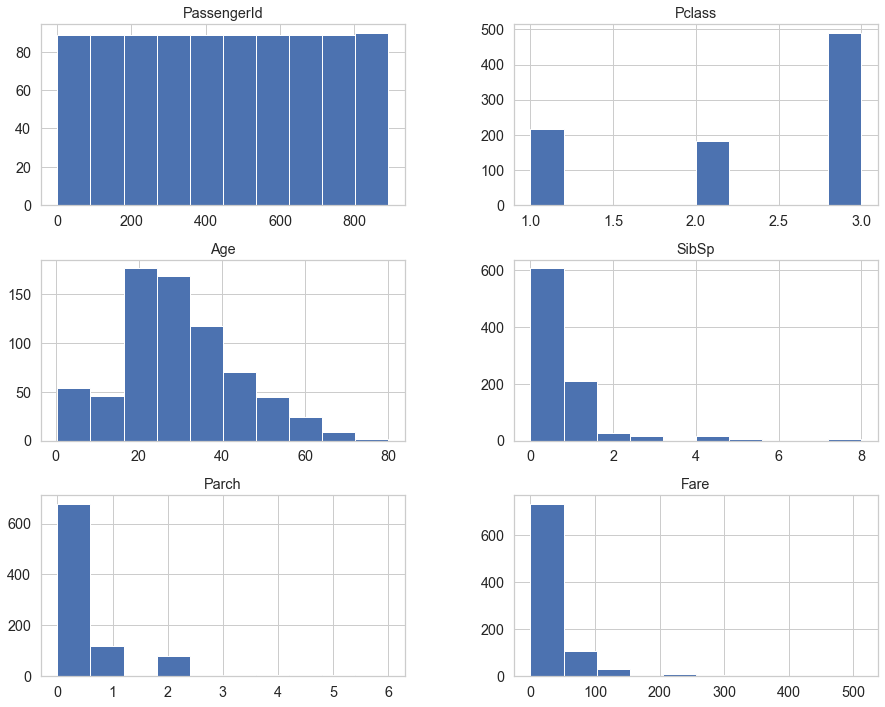

In [9]:
# plot a histogram for each numeric attribute from the database
df_train.hist(figsize=(15,12))
display()

**What was learned so far:**

* There were almost twice as many passengers in the 3rd class as 1st class or 2nd class.

* Most of the passengers were in their 20s or 30s. There were some children and number of people substancially decreases above 50s.

* The majority of the passengers had no siblings/spouses/children/parents on board. However, there were also families with more than 8 relatives on the Titanic.

* 75% of the travelers had paid up to 31 USD for the trip. However, there were some very expensive cabins, up to a maximum of 512 USD which corresponds to aproximatelly [17,000 USD nowdays](https://www.in2013dollars.com/us/inflation/1900?amount=512).

* There are no outstanding ouliers on this dataset.

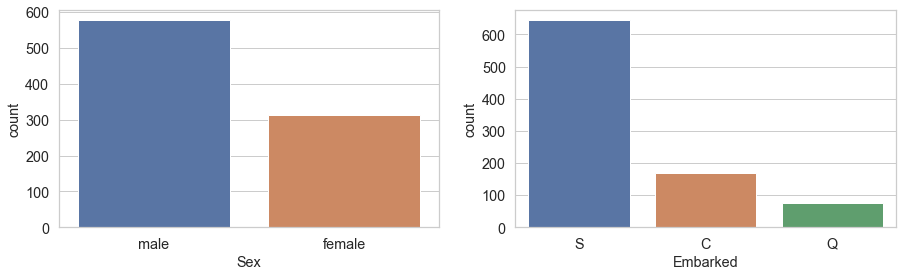

In [10]:
# Checking the distribution of Sex and Embarked
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

sns.countplot(x='Sex', data=df_train, ax=ax1)
sns.countplot(x='Embarked', data=df_train, ax=ax2)
display()

As there are around 20% of missing data in the `Age` attribute, It is worth to check how this information influences the chance of survival before cleaning the data.

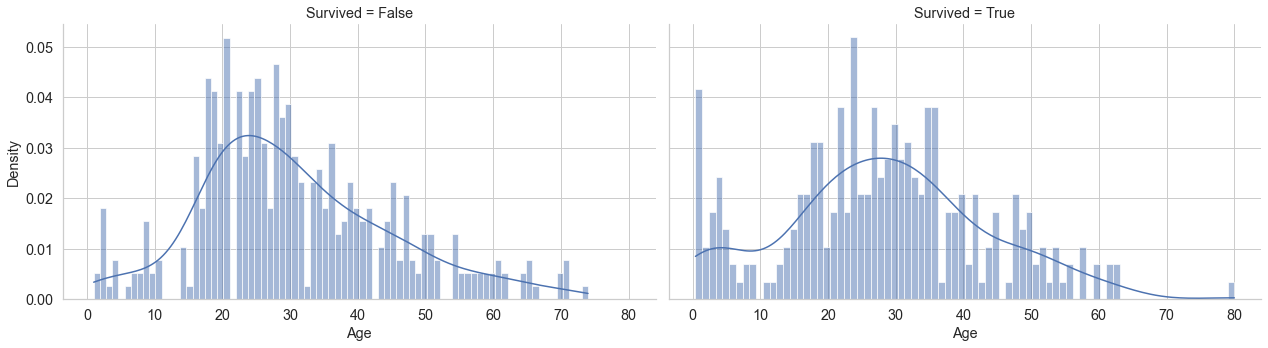

In [11]:
# Checking influence of age on the probability of survival
age_survived = sns.FacetGrid(df_train, col='Survived', height=5, aspect=16/9)
age_survived.map(sns.histplot, 'Age', stat='density', kde=True, bins=80)
display()

From the histograms above, the survivability is similar and seems to be independent of age. However, there is a peak of survivors of age close to zero. <br>
An insight seems to be that young kids had a priority to enter the safeboats.

### 2.4. Checking for duplicated samples

In [12]:
df_train.duplicated().any()

False

There are no duplicated samples (rows) on this dataset.

## 🧹 3. Data Cleaning

In [13]:
df_train_clean = df_train.copy()

In [14]:
df_train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.1. Fixing missing values

As checked in the dataset description, the `Age`, `Cabin` and `Embarked` attributes have missing data.

It is worth to check some samples.

#### 3.1.1. `Age`

In [15]:
missing_age = df_train_clean[df_train_clean.Age.isna()]
missing_age_idx = missing_age.index
missing_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,False,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,True,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,True,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,False,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,True,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [16]:
# including the Sex and Embarked values
dummy_df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])
dummy_df_train.corr()["Age"].abs().sort_values(ascending=False)

Age            1.000000
Pclass         0.369226
SibSp          0.308247
Parch          0.189119
Fare           0.096067
Sex_male       0.093254
Sex_female     0.093254
Survived       0.077221
PassengerId    0.036847
Embarked_C     0.036261
Embarked_S     0.032523
Embarked_Q     0.022405
Name: Age, dtype: float64

Since `Pclass` and `Sex` influence `Age`, a good strategy is to find the median/mean age in a group of passengers and add to the missing observations.

To achieve this goal, a transformer can be used.

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class GroupMissingImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_cols, target, metric='mean'):
        assert metric in ['mean', 'median'], 'Unrecognized value for metric, should be mean/median'
        assert type(group_cols) == list, 'group_cols should be a list of columns'
        assert type(target) == str, 'target should be a string'
        super().__init__()
        
        self.group_cols = group_cols
        self.target = target
        self.metric = metric
    
    def fit(self, X, y=None):
        assert pd.isnull(X.loc[:, self.group_cols]).any(axis=None) == False, 'There are missing values in group_cols'
        impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric).reset_index(drop=False)
        self.impute_map_ = impute_map
        
        return self 
    
    def transform(self, X, y=None):
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_map_')
        X = X.copy()
        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            attribute = X.loc[ind, self.target]
            mask = np.isnan(attribute)
            X.loc[ind, self.target] = X.loc[ind, self.target].mask(mask, row[self.target])
        
        return X

In [18]:
df_train_clean = GroupMissingImputer(group_cols=['Pclass','Sex'], target='Age', metric='median').fit_transform(df_train_clean)
df_train_clean.loc[missing_age_idx].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,False,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,True,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S
19,20,True,3,"Masselmani, Mrs. Fatima",female,21.5,0,0,2649,7.2250,NaN,C
26,27,False,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
28,29,True,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.5,0,0,330959,7.8792,NaN,Q


#### 3.1.2 `Cabin`

The Cabin attribute, seems to be missing most of the observations. It's hard to impute a value based on the other available samples. An approach is to add a missing field category.

In [19]:
missing_cabin = df_train_clean[df_train_clean['Cabin'].isna()]
missing_cabin_idx = missing_cabin.index
missing_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,False,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


With the insights above, a transformer is created to impute a constant value.

In [20]:
class ConstantImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target, value):
        assert type(target) == str, 'target should be a string'
        super().__init__()
        self.target = target
        self.value = value
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        X = X.copy()
        X[self.target] = X[self.target].fillna(self.value)
        
        return X

In [21]:
df_train_clean = ConstantImputer(target='Cabin', value='U').fit_transform(df_train_clean)
df_train_clean.loc[missing_cabin_idx].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
5,6,False,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,U,Q
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S


One important information that may be hidden on Cabin feature is the Deck in which the passenger was located. This may also have influence on the survival rate given the distance / escape routes.
An interesting approach was found on a [Kaggle notebook](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial#).
The first letter on Cabin feature indicates the Deck that the Cabin is located.
![alt text](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)
* It is known that Boat Deck includes letters from **T-Z** cabins.
* **A**, **B** and **C** decks were only for 1st class passengers. Also, these decks were served by elevators.
* **D** and **E** decks were for all classes.
* **F** and **G** decks were for both 2nd and 3rd class passengers.
* From **A** to **G**, distance to the Boat Deck increases which might be a factor of survival.

It is also noticiable that a higher number of life saving boats were located on the front side of Titanic.
![alt text](https://upload.wikimedia.org/wikipedia/commons/7/70/Titanic_lifeboats_on_boat_deck_plan.jpg)

By inspecting cabin locations, it is also noticiable that 1st-class cabins and dedicated rooms were located on a upper level, sligthly situated on the front portion of the ship.
![alt text](https://images.twinkl.co.uk/tw1n/image/private/t_630_eco/website/uploaded/t-t-9758b-the-titanic-cross-section-poster-a4-1554306892.png)


#### 3.1.3. `Embarked`

Since most of the passengers embarked on the port of Southampton, this value will be added to the missing observations.

In [22]:
missing_embarked = df_train_clean[df_train_clean['Embarked'].isna()]
missing_embarked_idx = missing_embarked.index
missing_embarked.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,True,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,True,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


To solve this problem, a transformer is created to impute the most common value of an attribute.

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class ModeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target):
        assert type(target) == str, 'target should be a string'
        super().__init__()
        self.target = target
    
    def fit(self, X, y=None):
        impute_value = X[self.target].agg(pd.Series.mode).iloc[0]
        self.impute_value_ = impute_value
        
        return self 
    
    def transform(self, X, y=None):
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_value_')
        X = X.copy()
        X[self.target] = X[self.target].fillna(self.impute_value_)
        
        return X

In [24]:
df_train_clean = ModeImputer(target='Embarked').fit_transform(df_train_clean)
df_train_clean.loc[missing_embarked_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,True,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,True,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


### 3.2. Saving the Dataset

In [25]:
df_train_clean.to_csv('./datasets/train_clean.csv', index=False)

## 📊 4. Explore the Data
As a next step, a _simple exploratory data analysis (EDA)_ is performed in order to gain insights about the data. <br/>
A more complete EDA with hypothesis about the problem should be further elaborated. 

In [26]:
# reload the cleaned training set
df_train = pd.read_csv('./datasets/train_clean.csv')

### 4.1. Getting our first insights

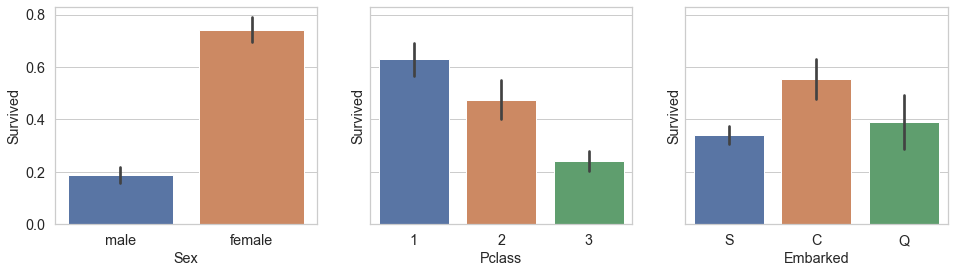

In [27]:
# Checking the proportion of survivors among different categorical attributes
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4), sharey=True)

sns.barplot(x='Sex', y='Survived', data=df_train, ax=ax1)
sns.barplot(x='Pclass', y='Survived', data=df_train, ax=ax2)
sns.barplot(x='Embarked', y='Survived', data=df_train, ax=ax3)
display()

* The chance of a woman surviving were much higher than a man (approximately 75% vs. 18%).

* 1st-class passengers had more than twice the chance of escaping the tragedy than the 3rd-class ones.

* Passengers that embarked on the port of Cherbourg had the most survivability, while the ones that launched in Southampton had a smaller chance. The reason for this difference is not clear, but can be related to the fact that [wealthier passengers boarded at Cherbourg](https://www.irishcentral.com/roots/history/on-this-day-titanic-sets-sail-southampton-cherbourg-france) which indicates that most likely they were 1st class passengers. <br>
There may be a correlation between the `Pclass` and `Embarked` features to corroborate this information.

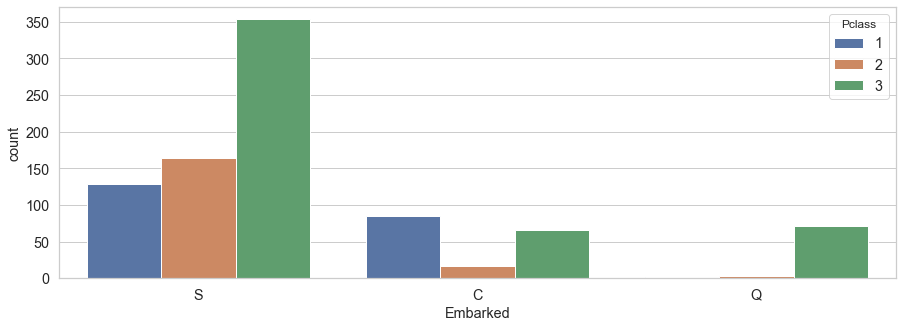

In [28]:
# Checking the distribution of Pclass among the different ports
sns.countplot(x='Embarked', hue='Pclass', data=df_train)
display()

The information seems to hold correct. The proportion of 1st-class and 3rd-class passengers is very different between the ports. <br>
While in Southampton there were almost a ratio of 1:3, in Cherbourg there are more 1st-class than 3rd-class passengers.

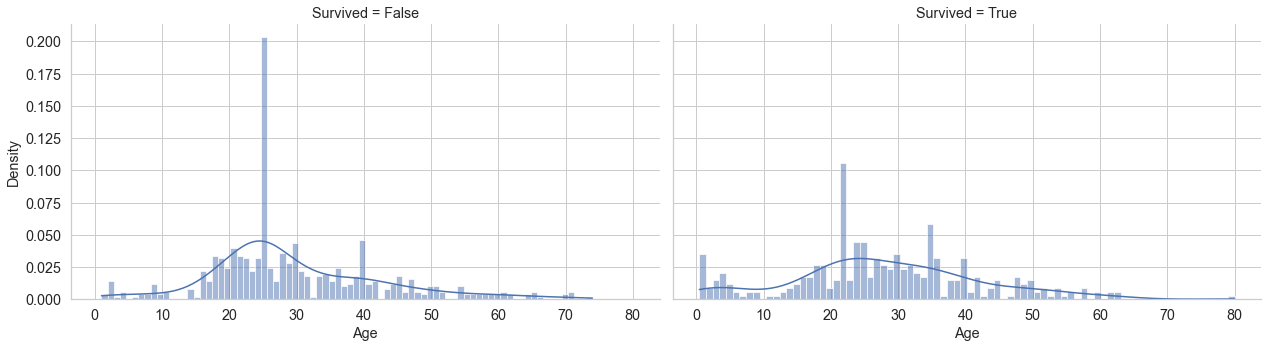

In [29]:
# Checking influence of age on the probability of survival
age_survived = sns.FacetGrid(df_train, col='Survived', height=5, aspect=16/9)
age_survived.map(sns.histplot, 'Age', stat='density', kde=True, bins=80)
display()

After the missing data was imputed, the distribution has a peak around 25 years old. One possibility is to try to improve imputing strategy by increase the variety of values.

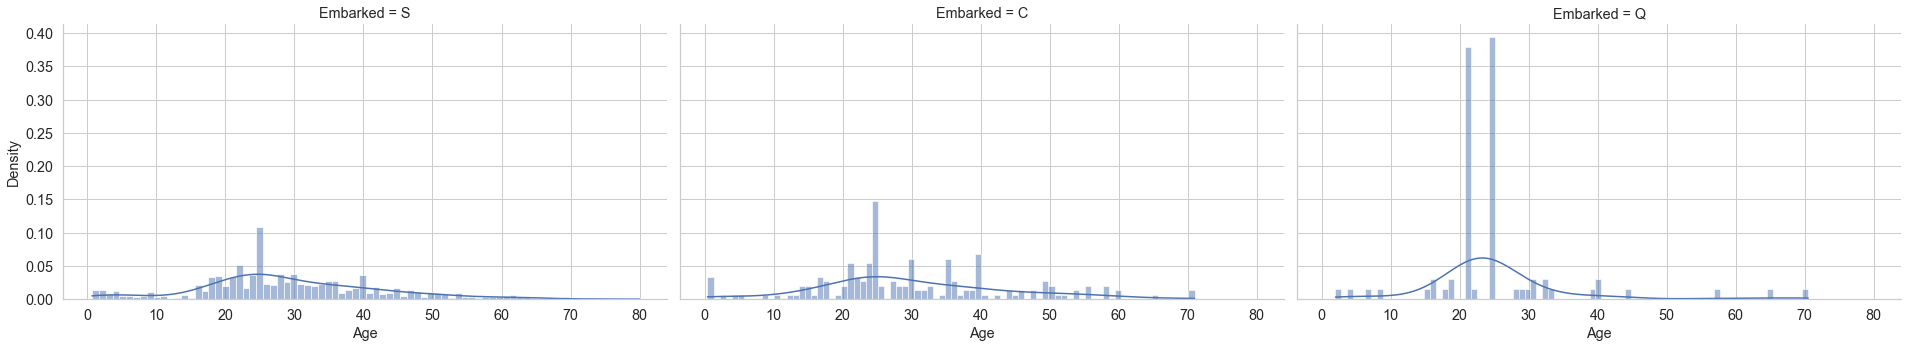

In [30]:
# Checking the difference of ages by port
age_survived = sns.FacetGrid(df_train, col='Embarked', height=5, aspect=16/9)
age_survived.map(sns.histplot, 'Age', stat='density', kde=True, bins=80)
display()

It is seen that the population that embarked on the port of Cherbourg were in average older than the others and also had more kids.<br>
This information can be useful to improve our `Age` imputation.

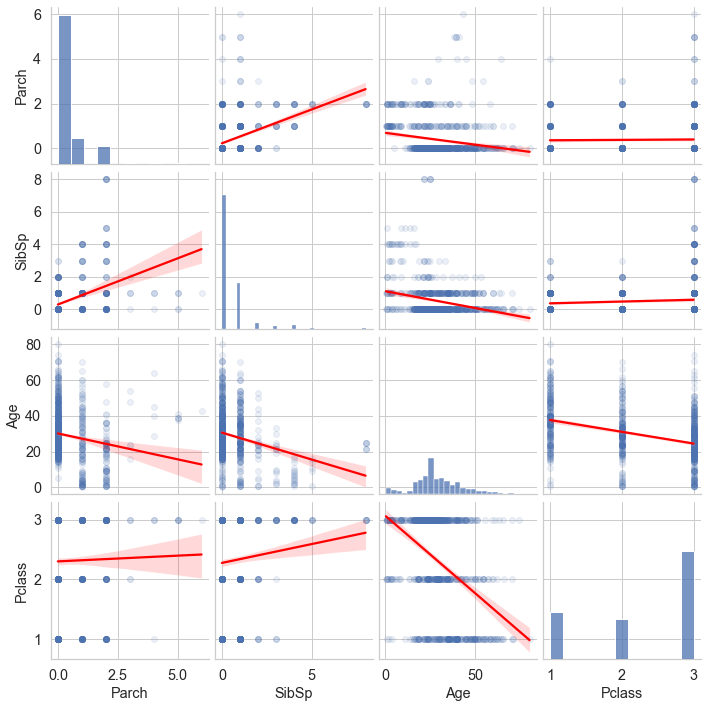

In [31]:
columns=['Parch', 'SibSp', 'Age', 'Pclass']
sns.pairplot(df_train[columns],kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
display()

* It seems that the oldest passengers are concentrated in the 1st-class and the youngest are on 3rd-class.

* 1st-class passengers also tend to have more siblings/spouses on board.

### 4.2. Looking for Correlations

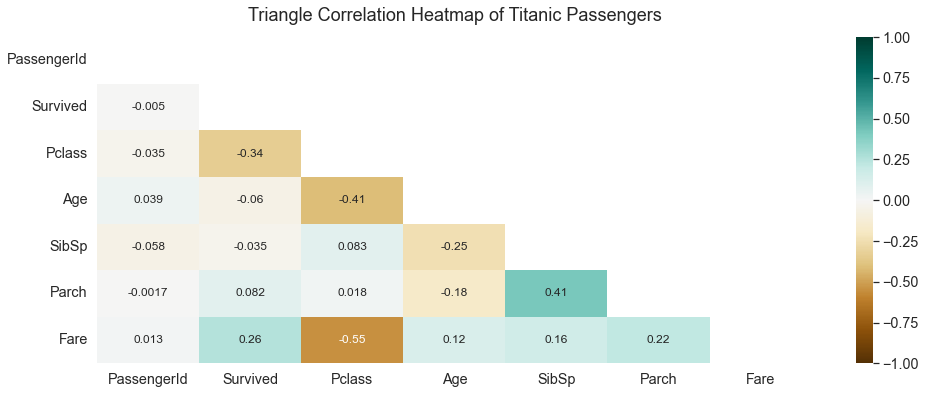

In [32]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train.corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Titanic Passengers', fontdict={'fontsize':18}, pad=16);

In [33]:
df_train.corr()["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.059579
Pclass        -0.338481
Name: Survived, dtype: float64

In [34]:
# including the Sex and Embarked values
dummy_df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])
dummy_df_train.corr()["Survived"].sort_values(ascending=False)

Survived       1.000000
Sex_female     0.543351
Fare           0.257307
Embarked_C     0.168240
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.059579
Embarked_S    -0.149683
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64

The _most promising attribute_ to predict the `Survived` is the `Sex`, followed by `Pclass` and `Fare`

### 4.3. Data distribution

In [35]:
numeric_attributes = df_train.select_dtypes(include='number').columns
numeric_attributes

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

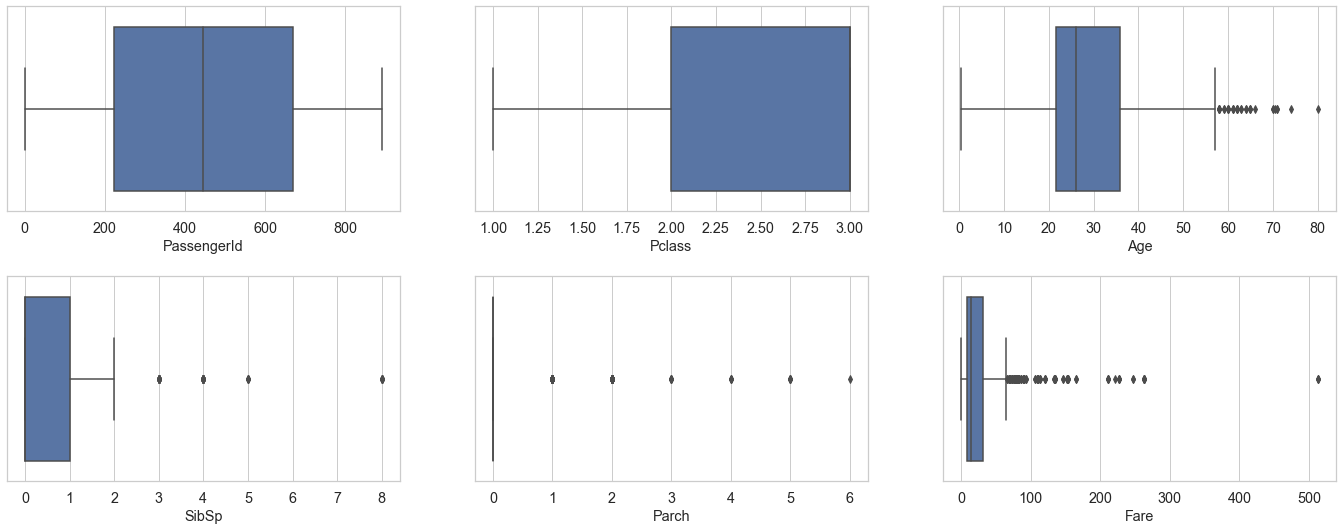

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
fig.tight_layout(pad=3.0)

for i, attr in enumerate(numeric_attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df_train, x=attr, ax=axes[row, col])

All the attributes have many _outliers_. However, those **will not** be removed them because _they do not seem to be noise_.

### 4.4. Deriving more information

There is a lot of information available in the categorical attributes like `Name`, `Cabin` and `Ticket`. A dive on these features might reveal some interesting knowledge.

#### 4.4.1. Family related attributes

Feature `Name` is the first chosen.

In [37]:
df_train['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

A pattern is seen: "\[Family Name\], \[Title\] \[Name|Husband\]? (\[Name|Nickname\])?".<br>
\* Groups marked with "?" are optional.

On next step, this information will me extracted.

In [38]:
name_attributes = df_train['Name'].str.extract(r'^(?P<FamilyName>.+),\s+(?P<Title>[\w|\s]*\w)\.\s(?P<NameOrHusband>[\w|\s]*\w)?\s?\(?(?P<NameOrNickname>[\w|\s]*\w)?\)?')
df_train = df_train.join(name_attributes)
name_attributes.head(10)

,FamilyName,Title,NameOrHusband,NameOrNickname
0,Braund,Mr,Owen Harris,NaN
1,Cumings,Mrs,John Bradley,Florence Briggs Thayer
2,Heikkinen,Miss,Laina,NaN
3,Futrelle,Mrs,Jacques Heath,Lily May Peel
4,Allen,Mr,William Henry,NaN
5,Moran,Mr,James,NaN
6,McCarthy,Mr,Timothy J,NaN
7,Palsson,Master,Gosta Leonard,NaN
8,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg
9,Nasser,Mrs,Nicholas,Adele Achem


In [39]:
# Checking the biggest families
name_attributes.groupby('FamilyName').size().reset_index(name='size').sort_values('size', ascending=False).head(10)

,FamilyName,size
16,Andersson,9
532,Sage,7
563,Skoog,6
100,Carter,6
220,Goodwin,6
292,Johnson,6
464,Panula,6
505,Rice,5
32,Baclini,4
189,Fortune,4


In [40]:
# Checking the frequency of titles
name_attributes.groupby('Title').size().reset_index(name='size').sort_values('size', ascending=False)

,Title,size
11,Mr,517
8,Miss,182
12,Mrs,125
7,Master,40
3,Dr,7
14,Rev,6
6,Major,2
1,Col,2
9,Mlle,2
15,Sir,1


If the `FamilyName` and `NameOrHusband` attributes are duplicated, it means that there is a couple traveling together.

In [41]:
# Checking the couples
traveling_with_spouse = name_attributes.reset_index().groupby(['FamilyName','NameOrHusband'])['NameOrHusband'].transform('count') > 1
df_train['TravelingWithSpouse'] = traveling_with_spouse
name_attributes[traveling_with_spouse].head(10)

,FamilyName,Title,NameOrHusband,NameOrNickname
3,Futrelle,Mrs,Jacques Heath,Lily May Peel
9,Nasser,Mrs,Nicholas,Adele Achem
13,Andersson,Mr,Anders Johan,NaN
34,Meyer,Mr,Edgar Joseph,NaN
35,Holverson,Mr,Alexander Oskar,NaN
41,Turpin,Mrs,William John Robert,Dorothy Ann Wonnacott
49,Arnold-Franchi,Mrs,Josef,Josefine Franchi
52,Harper,Mrs,Henry Sleeper,Myna Haxtun
62,Harris,Mr,Henry Birkhardt,NaN
85,Backstrom,Mrs,Karl Alfred,Maria Mathilda Gustafsson


In [42]:
# Counting the couples
df_train['TravelingWithSpouse'].value_counts()

False    807
True      84
Name: TravelingWithSpouse, dtype: int64

There are 84 people traveling if their spouses.<br>
Does it influence the chance of surviving the sinking?

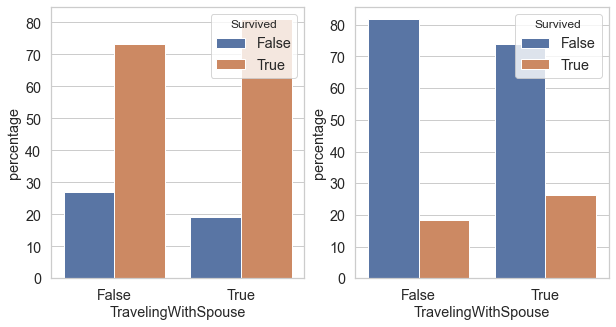

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

female_survived_counts = (df_train.query('Sex == "female"').groupby(['TravelingWithSpouse'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
male_survived_counts = (df_train.query('Sex == "male"').groupby(['TravelingWithSpouse'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())

p = sns.barplot(x="TravelingWithSpouse", y="percentage", hue="Survived", data=female_survived_counts, ax=axs[0])
p = sns.barplot(x="TravelingWithSpouse", y="percentage", hue="Survived", data=male_survived_counts, ax=axs[1])

plt.show()

It seems that both men and women have a slightly higher chance of surviving when are traveling with their spouses.

#### 4.4.2. Frequency of the tickets

It is seen that the `Ticket` attribute is not unique to each observation. Is there something can be learned from this variable?

In [44]:
df_train['TicketFrequency'] = df_train.groupby('Ticket')['Ticket'].transform('count')
df_train.query('TicketFrequency > 1').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Title,NameOrHusband,NameOrNickname,TravelingWithSpouse,TicketFrequency
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel,True,2
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S,Palsson,Master,Gosta Leonard,NaN,False,4
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg,False,3
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C,Nasser,Mrs,Nicholas,Adele Achem,True,2
10,11,True,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Miss,Marguerite Rut,NaN,False,2


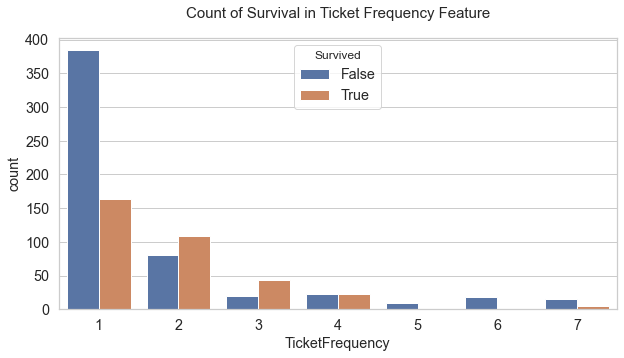

In [45]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.countplot(x='TicketFrequency', hue='Survived', data=df_train)

plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

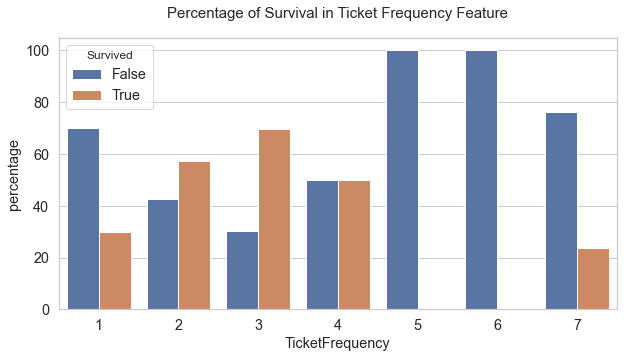

In [46]:
fig, axs = plt.subplots(figsize=(10, 5))
survived_counts = (df_train.groupby(['TicketFrequency'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
p = sns.barplot(x="TicketFrequency", y="percentage", hue="Survived", data=survived_counts)

plt.title('Percentage of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

It seems that individuals traveling in small groups (2-4 people) tend to have a higher chance of survival. Not all of them are relatives. 

According to [Enciclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-passenger-servants/) there were servants hired by wealthy people that were in the ship as well.<br>
Their tickets can been bought by their bosses.

In [47]:
df_train['SmallGroup'] = (df_train['TicketFrequency'] > 1) & (df_train['TicketFrequency'] < 5)
df_train['SmallGroup']

0      False
1      False
2      False
3       True
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: SmallGroup, Length: 891, dtype: bool

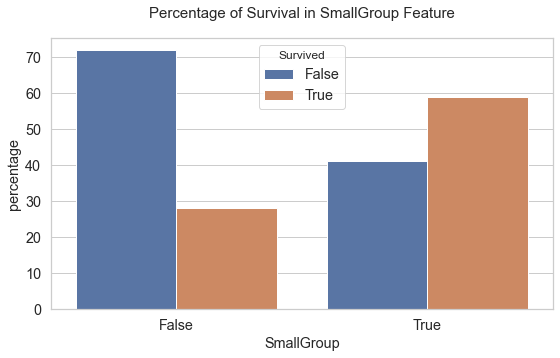

In [48]:
fig, axs = plt.subplots(figsize=(9, 5))
survived_counts = (df_train.groupby(['SmallGroup'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
p = sns.barplot(x="SmallGroup", y="percentage", hue="Survived", data=survived_counts)

plt.title('Percentage of Survival in {} Feature'.format('SmallGroup'), size=15, y=1.05)

plt.show()

People traveling in small groups have around twice as much chance of surviving as those who are not.

#### 4.4.3. Family size

Attributes `SibSp` and `Parch` can be grouped to compute the size of the families travelling together.

In [49]:
df_train['FamilySize'] = 1 + df_train['Parch'] + df_train['SibSp']
df_train[df_train['FamilySize'] > 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Title,NameOrHusband,NameOrNickname,TravelingWithSpouse,TicketFrequency,SmallGroup,FamilySize
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Braund,Mr,Owen Harris,NaN,False,1,False,2
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer,False,1,False,2
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel,True,2,True,2
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S,Palsson,Master,Gosta Leonard,NaN,False,4,True,5
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg,False,3,True,3


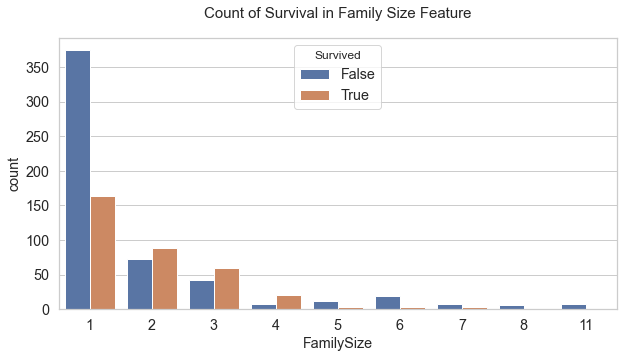

In [50]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df_train)
plt.title('Count of Survival in {} Feature'.format('Family Size'), size=15, y=1.05)

plt.show()

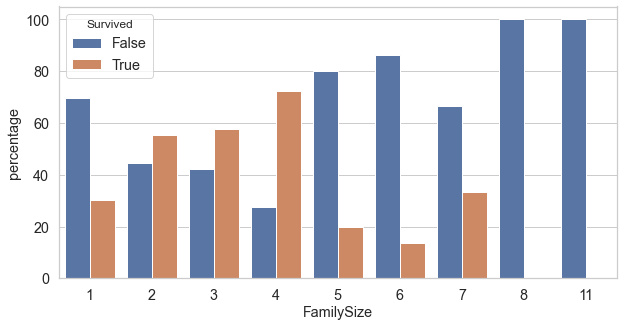

In [51]:
fig, axs = plt.subplots(figsize=(10, 5))
survived_counts = (df_train.groupby(['FamilySize'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
p = sns.barplot(x="FamilySize", y="percentage", hue="Survived", data=survived_counts)

plt.show()

Small families of 2-4 people tend to have a higher chance of surviving.

In [52]:
df_train['SmallFamily'] = (df_train['FamilySize'] > 1) & (df_train['FamilySize'] < 5)
df_train['SmallFamily']

0       True
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: SmallFamily, Length: 891, dtype: bool

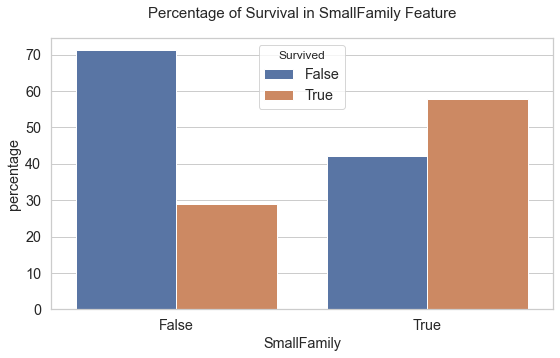

In [53]:
fig, axs = plt.subplots(figsize=(9, 5))
survived_counts = (df_train.groupby(['SmallFamily'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="SmallFamily", y="percentage", hue="Survived", data=survived_counts)

plt.title('Percentage of Survival in {} Feature'.format('SmallFamily'), size=15, y=1.05)

plt.show()

People traveling in small families also have a greater chance of survival.

#### 4.4.4. Individuals traveling alone

With the two features created above, individuals that are traveling is extracted.<br>
This is true is the `FamilySize` and `TicketFrequency` are both equal to one.

In [54]:
df_train['IsAlone'] = (df_train['FamilySize'] == 1) & (df_train['TicketFrequency'] == 1)
df_train[df_train['IsAlone']].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilyName,Title,NameOrHusband,NameOrNickname,TravelingWithSpouse,TicketFrequency,SmallGroup,FamilySize,SmallFamily,IsAlone
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Heikkinen,Miss,Laina,NaN,False,1,False,1,False,True
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Allen,Mr,William Henry,NaN,False,1,False,1,False,True
5,6,False,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,...,Moran,Mr,James,NaN,False,1,False,1,False,True
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,McCarthy,Mr,Timothy J,NaN,False,1,False,1,False,True
11,12,True,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,...,Bonnell,Miss,Elizabeth,NaN,False,1,False,1,False,True


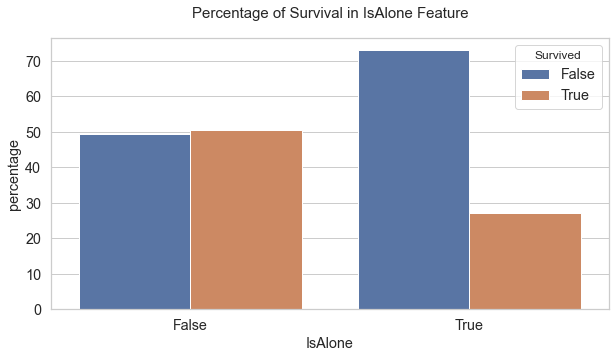

In [55]:
fig, axs = plt.subplots(figsize=(10, 5))
survived_counts = (df_train.groupby(['IsAlone'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="IsAlone", y="percentage", hue="Survived", data=survived_counts)
plt.title('Percentage of Survival in {} Feature'.format('IsAlone'), size=15, y=1.05)

plt.show()

It is confirmed that individuals that didn't travel alone had a much higher chance of survival (~50% vs. ~27%).

#### 4.4.5. Is Married

A women that are married is identified when their `Title` is Mrs/Lady/the Countess/Mme

In [56]:
df_train['IsMarried'] = df_train['Title'].str.contains('Mrs|Mme|the Countess|Lady')
df_train[df_train['IsMarried']].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,NameOrHusband,NameOrNickname,TravelingWithSpouse,TicketFrequency,SmallGroup,FamilySize,SmallFamily,IsAlone,IsMarried
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,John Bradley,Florence Briggs Thayer,False,1,False,2,True,False,True
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,Jacques Heath,Lily May Peel,True,2,True,2,True,False,True
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,Mrs,Oscar W,Elisabeth Vilhelmina Berg,False,3,True,3,True,False,True
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,Mrs,Nicholas,Adele Achem,True,2,True,2,True,False,True
15,16,True,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,...,Mrs,NaN,Mary D Kingcome,False,1,False,1,False,True,True


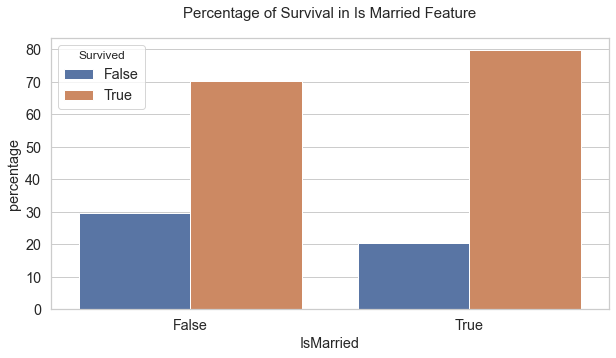

In [57]:
fig, axs = plt.subplots(figsize=(10, 5))
survived_counts = (df_train.query('Sex == "female"').groupby(['IsMarried'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="IsMarried", y="percentage", hue="Survived", data=survived_counts)

plt.title('Percentage of Survival in {} Feature'.format('Is Married'), size=15, y=1.05)

plt.show()

A married women had a higher chance of surviving (~80% vs. ~70%)

#### 4.4.6. Is Child

In order to get information on how children were able to survive the sinking of the Titanic , an understanding is taken to take as children the passengers of less than 15 years old.

In [58]:
df_train['IsChild'] = df_train['Age'] < 15
df_train[df_train['IsChild']].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NameOrHusband,NameOrNickname,TravelingWithSpouse,TicketFrequency,SmallGroup,FamilySize,SmallFamily,IsAlone,IsMarried,IsChild
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,Gosta Leonard,NaN,False,4,True,5,False,False,False,True
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,Nicholas,Adele Achem,True,2,True,2,True,False,True,True
10,11,True,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,...,Marguerite Rut,NaN,False,2,True,3,True,False,False,True
14,15,False,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,...,Hulda Amanda Adolfina,NaN,False,1,False,1,False,True,False,True
16,17,False,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,...,Eugene,NaN,False,5,False,6,False,False,False,True


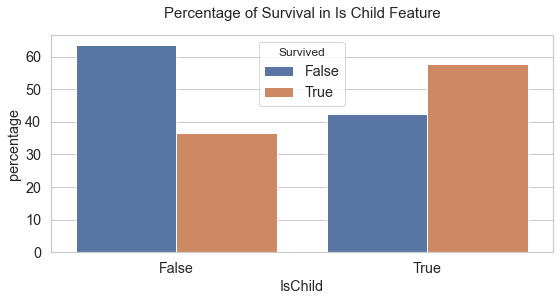

In [59]:
fig, axs = plt.subplots(figsize=(9, 4))
survived_counts = (df_train.groupby(['IsChild'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="IsChild", y="percentage", hue="Survived", data=survived_counts)

plt.title('Percentage of Survival in {} Feature'.format('Is Child'), size=15, y=1.05)

plt.show()

It's confirmed that kids have a higher survivability. Almost 60% of them survived, against ~35% of the adult passengers.

#### 4.4.7. Fare by Passenger

As some passengers share the same `Ticket`, their `Fare` is also the same.<br>
To compute the Fare by Passenger, the whole value is divided by the `TicketFrequency` attribute already calculated.

In [60]:
df_train['FareByPassenger'] = df_train['Fare'] / df_train['TicketFrequency']
df_train['FareByPassenger'] = df_train['Fare'] / df_train['TicketFrequency']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NameOrNickname,TravelingWithSpouse,TicketFrequency,SmallGroup,FamilySize,SmallFamily,IsAlone,IsMarried,IsChild,FareByPassenger
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,NaN,False,1,False,2,True,False,False,False,7.2500
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Florence Briggs Thayer,False,1,False,2,True,False,True,False,71.2833
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,NaN,False,1,False,1,False,True,False,False,7.9250
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Lily May Peel,True,2,True,2,True,False,True,False,26.5500
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,NaN,False,1,False,1,False,True,False,False,8.0500


#### 4.4.8. Passenger cabin´s floor
Extract the first letter from Cabin denotes the Floor that the Cabin belongs to.

In [61]:
# Extracting the first value in the each row of Cabin
df_train['Floor'] = df_train['Cabin'].map(lambda x: x[0])

# Return the counts of each unique value in the Floor column
df_train['Floor'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Floor, dtype: int64

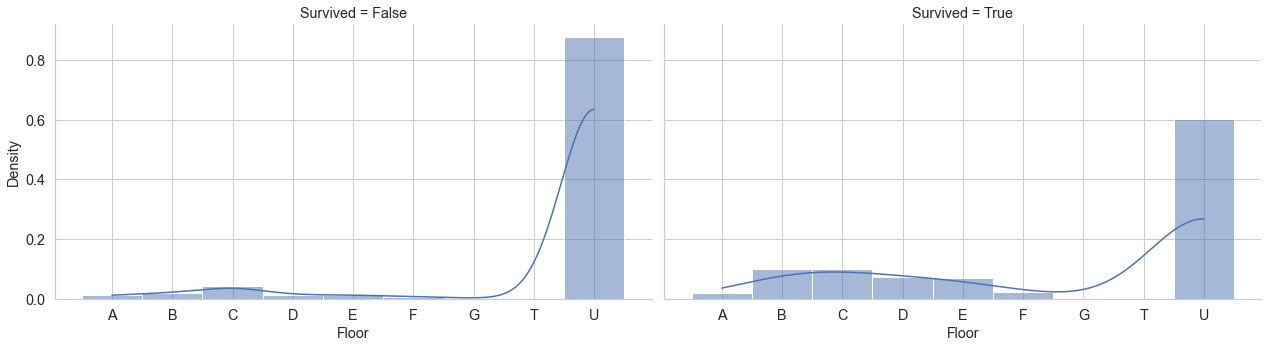

In [62]:
# Checking influence of the floor on the probability of survival
floor_survived = sns.FacetGrid(df_train.sort_values('Floor'), col='Survived', height=5, aspect=16/9)
floor_survived.map(sns.histplot, 'Floor', stat='density', kde=True, bins=80)
display()

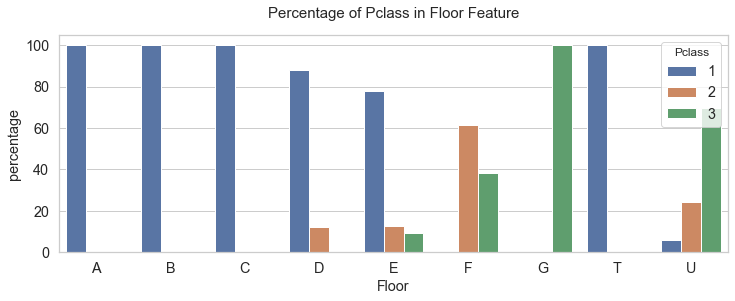

In [63]:
fig, axs = plt.subplots(figsize=(12, 4))
pclass_counts = (df_train.groupby(['Floor'])['Pclass']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="Floor", y="percentage", hue="Pclass", data=pclass_counts)

plt.title('Percentage of Pclass in {} Feature'.format('Floor'), size=15, y=1.05)

plt.show()

It's possible to see that the floors A, B, C, and T have nearly 100% of 1st-class passengers.<br>
Other floors also have similar characteristics.

It is possible to group the floors given the known characterists of the population on each floor.

In [64]:
floors = {'A' : 'ABC', 'B' : 'ABC', 'C' : 'ABC', 'D' : 'DE', 'E' : 'DE', 'F' : 'FG', 'G' : 'FG', 'T' : 'ABC', 'U' : 'U'}
df_train['FloorGroup'] = df_train['Floor'].map(floors)
df_train['FloorGroup'].value_counts()

U      687
ABC    122
DE      65
FG      17
Name: FloorGroup, dtype: int64

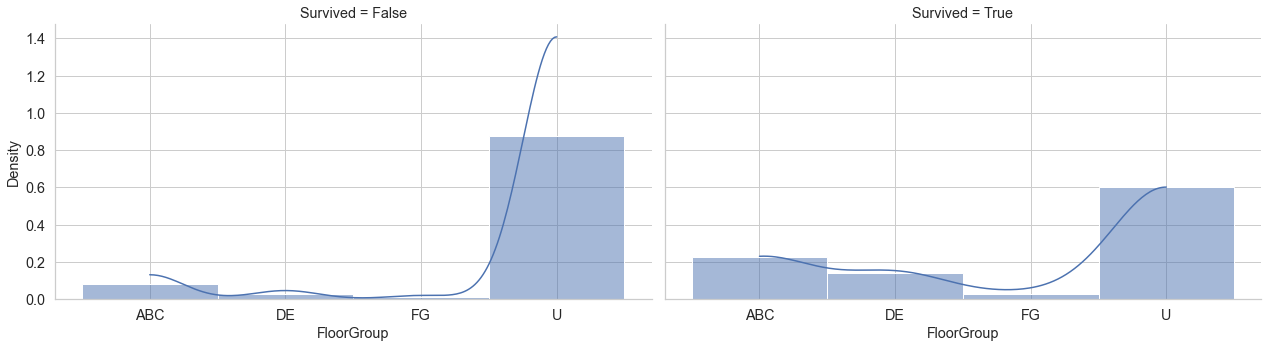

In [65]:
# Checking influence of the floor group on the probability of survival
floor_survived = sns.FacetGrid(df_train.sort_values('FloorGroup'), col='Survived', height=5, aspect=16/9)
floor_survived.map(sns.histplot, 'FloorGroup', stat='density', kde=True, bins=80)
display()

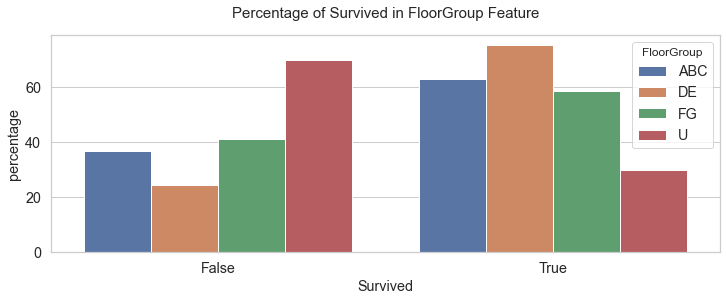

In [66]:
fig, axs = plt.subplots(figsize=(12, 4))
pclass_counts = (df_train.groupby(['FloorGroup'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.barplot(x="Survived", y="percentage", hue="FloorGroup", data=pclass_counts)

plt.title('Percentage of Survived in {} Feature'.format('FloorGroup'), size=15, y=1.05)

plt.show()

### 4.5. Looking for the new Correlations

In [67]:
dummy_df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'FloorGroup'])
dummy_df_train.corr()["Survived"].sort_values(ascending=False)

Survived               1.000000
Sex_female             0.543351
IsMarried              0.347864
SmallGroup             0.298000
SmallFamily            0.279855
Fare                   0.257307
FareByPassenger        0.254824
FloorGroup_DE          0.213430
FloorGroup_ABC         0.202551
Embarked_C             0.168240
IsChild                0.122978
TravelingWithSpouse    0.100756
Parch                  0.081629
FloorGroup_FG          0.058617
TicketFrequency        0.038247
FamilySize             0.016639
Embarked_Q             0.003650
PassengerId           -0.005007
SibSp                 -0.035322
Age                   -0.059579
Embarked_S            -0.149683
IsAlone               -0.241717
FloorGroup_U          -0.316912
Pclass                -0.338481
Sex_male              -0.543351
Name: Survived, dtype: float64

## 🛠️ 5. Prepare the Data (Preprocessing)

In [239]:
# load the cleaned training set
df_train = pd.read_csv('./datasets/train_clean.csv')

### 5.1. Adding new features

Before prepare the model, it is worth to explore some new features, based on what was learned for far.

A transformers for the most promising features that were already found can be created.

- `IsMarried`
- `SmallGroup`
- `SmallFamily`
- `FareByPassenger`
- `IsChild`
- `TravelingWithSpouse`
- `IsAlone`
- `FloorGroup`

In [240]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
    
    def fit(self, X, y=None):
        self.ticket_frequency_impute_map_ = X.groupby('Ticket')['Ticket'].agg('count').reset_index(name='TicketFrequency')
        
        return self 
    
    def transform(self, X, y=None):
        # make sure that the imputer was fitted
        check_is_fitted(self, 'ticket_frequency_impute_map_')
        X = X.copy()
        
        # TravelingWithSpouse
        name_attributes = X['Name'].str.extract(r'^(?P<FamilyName>.+),\s+(?P<Title>[\w|\s]*\w)\.\s(?P<NameOrHusband>[\w|\s]*\w)?')
        X['TravelingWithSpouse'] = name_attributes.reset_index().groupby(['FamilyName','NameOrHusband'])['NameOrHusband'].transform('count') > 1
        
        # IsMarried
        X['IsMarried'] = name_attributes['Title'].str.contains('Mrs|Mme|the Countess|Lady')
        
        # TicketFrequency
        ticket_frequency = np.ones(X.shape[0])
        for index, row in self.ticket_frequency_impute_map_.iterrows():
            ind = pd.DataFrame((X['Ticket'] == row['Ticket'])).all(axis=1)
            ticket_frequency[ind] = row['TicketFrequency']  
        ticket_frequency[np.isnan(ticket_frequency)] = 1 # fill possible missing rows in CV
        
        # SmallFamily
        family_size = 1 + X['Parch'] + X['SibSp']
        X['SmallFamily'] = (family_size > 1) & (family_size < 5)
        
        # SmallGroup    
        X['SmallGroup'] = (ticket_frequency > 1) & (ticket_frequency < 5)
        
        # IsAlone
        X['IsAlone'] = (family_size == 1) & (ticket_frequency == 1)
        
        # IsChild
        X['IsChild'] = X['Age'] < 15
        
        # FareByPassenger    
        X['FareByPassenger'] = X['Fare'] / ticket_frequency
        
        #Floor or Deck
        floors = {'A' : 'ABC', 'B' : 'ABC', 'C' : 'ABC', 'D' : 'DE', 'E' : 'DE', 'F' : 'FG', 'G' : 'FG', 'T' : 'ABC', 'U' : 'U'}
        X['FloorGroup'] = X['Cabin'].map(lambda x: x[0]).map(floors, na_action='ignore').fillna('U')
        
        return X

In [241]:
df_train = FeatureEngineeringTransformer().fit_transform(df_train)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelingWithSpouse,IsMarried,SmallFamily,SmallGroup,IsAlone,IsChild,FareByPassenger,FloorGroup
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,False,False,True,False,False,False,7.2500,U
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,True,False,False,False,71.2833,ABC
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,False,False,False,False,True,False,7.9250,U
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,True,True,True,False,False,26.5500,ABC
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,False,False,False,False,True,False,8.0500,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S,False,False,False,False,True,False,13.0000,U
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,False,False,False,True,False,30.0000,ABC
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,U,S,False,False,True,True,False,False,11.7250,U
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,False,False,False,True,False,30.0000,ABC


### 5.2. Removing attributes that are not used

Some attributes that won't be used on the model can be removed. For that, a transformer is created.

In [242]:
class AttributesRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        assert type(cols) == list, 'cols should be a list of columns'
        super().__init__()
        
        self.cols = cols
        pass
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        X = X.copy()
        
        # removing the useless features
        X = X.drop(self.cols, axis=1)
        
        return X

In [243]:
df_train = AttributesRemovalTransformer(['PassengerId', 'Name', 'Ticket', 'Cabin']).fit_transform(df_train)
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'TravelingWithSpouse', 'IsMarried', 'SmallFamily',
       'SmallGroup', 'IsAlone', 'IsChild', 'FareByPassenger', 'FloorGroup'],
      dtype='object')

### 5.4. Separating the independent variables (features) and the dependent variable (target outcome)

In [244]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'TravelingWithSpouse', 'IsMarried', 'SmallFamily',
       'SmallGroup', 'IsAlone', 'IsChild', 'FareByPassenger', 'FloorGroup'],
      dtype='object')

In [245]:
# store the target outcome into a numpy array
y_train = df_train['Survived']

In [246]:
# overwrite the dataframe with only the features  
df_train = df_train.drop(columns=['Survived'])

### 5.5. Separate the _numerical_ and _categorical_ features
As different preprocessing tasks (transformations) were performed, to _numerical_ features and _categorical_ ones, it makes sense to split dataset into two different dataframes.

For that, new transformers are create in order to automate the process.<br>
Also, Pandas DataFrame is also transformed to a Numpy Array, in order to use ScikitLearn transformers.

In [247]:
class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_cols):    
        super().__init__()
        
        self.numerical_cols = numerical_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Numerical features to pass down the numerical pipeline
        X = X[self.numerical_cols]
        X = X.replace([np.inf, -np.inf], np.nan)
        return X.values

In [248]:
num_attributes = list(df_train.select_dtypes(include='number').columns)
num_attributes

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FareByPassenger']

In [249]:
X_train_num =  NumericalTransformer(num_attributes).fit_transform(df_train)
X_train_num

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833, 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  7.925 ],
       ...,
       [ 3.    , 21.5   ,  1.    ,  2.    , 23.45  , 11.725 ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  7.75  ]])

In [250]:
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols):
        super().__init__()
        
        self.categorical_cols = categorical_cols

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    # Transformer method for this transformer
    def transform(self, X, y=None):
        # Categorical features to pass down the categorical pipeline
        return X[self.categorical_cols].values

In [251]:
cat_attributes = list(df_train.select_dtypes(exclude='number').columns)
cat_attributes

['Sex',
 'Embarked',
 'TravelingWithSpouse',
 'IsMarried',
 'SmallFamily',
 'SmallGroup',
 'IsAlone',
 'IsChild',
 'FloorGroup']

In [252]:
X_train_cat = CategoricalTransformer(cat_attributes).fit_transform(df_train)
X_train_cat

array([['male', 'S', False, ..., False, False, 'U'],
       ['female', 'C', False, ..., False, False, 'ABC'],
       ['female', 'S', False, ..., True, False, 'U'],
       ...,
       ['female', 'S', False, ..., False, False, 'U'],
       ['male', 'C', False, ..., True, False, 'ABC'],
       ['male', 'Q', False, ..., True, False, 'U']], dtype=object)

### 5.6. Feature Scaling

In order to scale the features, a RobustScaler from ScikitLearn is used.

In [253]:
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled

array([[ 0.82737724, -0.53489116,  0.43279337, -0.47367361, -0.50244517,
        -0.49697568],
       [-1.56610693,  0.66839176,  0.43279337, -0.47367361,  0.78684529,
         2.52257329],
       [ 0.82737724, -0.23407043, -0.4745452 , -0.47367361, -0.48885426,
        -0.46514544],
       ...,
       [ 0.82737724, -0.57249375,  0.43279337,  2.00893337, -0.17626324,
        -0.28595295],
       [-1.56610693, -0.23407043, -0.4745452 , -0.47367361, -0.04438104,
         0.57582143],
       [ 0.82737724,  0.21716066, -0.4745452 , -0.47367361, -0.49237783,
        -0.47339772]])

### 5.7. Categorical Variable Encoding

Categorical variables are transformed into numerical ones by using OneHotEncoder from ScikitLearn.

In [254]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat_1hot = encoder.fit_transform(X_train_cat)
X_train_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [255]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([False, True], dtype=object),
 array([False, True], dtype=object),
 array([False, True], dtype=object),
 array([False, True], dtype=object),
 array([False, True], dtype=object),
 array([False, True], dtype=object),
 array(['ABC', 'DE', 'FG', 'U'], dtype=object)]

### 5.8 PolynomialFeatures

In order to create a non-linear model, correlation between the variables is explored using the PolynomialFeatures transformer from ScikitLearn.

**⚠️ Warning:** this transformer *must* be used before the FeatureScaling in the Pipeline, so the PolynomialFeatures increase signal before scaling.


In [256]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_transformer = PolynomialFeatures(include_bias=False, interaction_only=True)

X_train_num_poly = polynomial_transformer.fit_transform(X_train_num)
X_train_num_poly

array([[3.00000000e+00, 2.20000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.25625000e+01],
       [1.00000000e+00, 3.80000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.08130886e+03],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.28056250e+01],
       ...,
       [3.00000000e+00, 2.15000000e+01, 1.00000000e+00, ...,
        4.69000000e+01, 2.34500000e+01, 2.74951250e+02],
       [1.00000000e+00, 2.60000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.00000000e+02],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.00625000e+01]])

In [257]:
X_train_num_poly.shape

(891, 21)

### 5.9. Preprocessing Pipelines

For automating the whole preprocessing phase, a preprocessing pipeline is built.

In [258]:
from sklearn.pipeline import Pipeline, FeatureUnion

#### Pipeline for feature engineering

In [259]:
features_pipeline = Pipeline([
    ('age_imputer', GroupMissingImputer(
        group_cols=['Pclass','Sex'],
        target='Age',
        metric='median')),
    ('cabin_imputer', ConstantImputer(
        target='Cabin',
        value='U')),
    ('embarked_imputer', ModeImputer(
        target='Embarked')),
    ('feat_engineering', FeatureEngineeringTransformer()),
    ('feats_remover', AttributesRemovalTransformer(
        ['PassengerId', 'Name', 'Ticket', 'Cabin']))
])

#### Pipeline for numerical data

In [260]:
from sklearn.impute import SimpleImputer

numerical_pipeline = Pipeline([
    ('num_transformer', NumericalTransformer(num_attributes)),
    ('imputer', SimpleImputer()),
    ('poly_feat_transformer', PolynomialFeatures(include_bias=False, interaction_only=True)),
    ('scaler', RobustScaler())
])

A SimpleImputer is included to handle the missing `Fare` attribute in the test set.

#### Pipeline for categorical data

In [261]:
categorical_pipeline = Pipeline([
    ('cat_transformer', CategoricalTransformer(cat_attributes)),
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

#### Union Pipeline

In [262]:
union_pipeline = FeatureUnion([
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

#### Full Preprocessing Pipeline

In [263]:
preprocessing_pipeline = Pipeline([
    ('features_pipeline', features_pipeline),
    ('union_pipeline', union_pipeline),
])

In [195]:
# reload the cleaned training set
df_train_clean = pd.read_csv('./datasets/train_clean.csv')

df_train_pre_npy = preprocessing_pipeline.fit_transform(df_train_clean)

In [196]:
df_train_pre_npy

array([[ 0.        , -0.27586207,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-2.        ,  0.82758621,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        , -0.31034483,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-2.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.4137931 ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

### 5.10. Saving the Pipeline

In [96]:
import joblib

joblib.dump(preprocessing_pipeline, './models/preprocessing_pipeline.pkl')

['./models/preprocessing_pipeline.pkl']

### 5.11. Saving the Preprocessed Training Set

In [97]:
np.save('./datasets/train_pre_numpy.npy', df_train_pre_npy)

## 🏋️‍♀️ 6. Train ML Algorithms

### 6.1. Auto ML - a Pycaret evaluation

In this step we will test many different algorithms with their standard hyperparameters to check the performance on solving the problem.

#### 6.1.1. Pycaret import

In [98]:
from pycaret.classification import *

#### 6.1.2. Load the train data

In [99]:
df_train = pd.read_csv('./datasets/train_clean.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,U,S
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 6.1.3. Setup the algorithm

Using the 'Survived' feature as the target, a train/test as 0.8/0.2, enabling normalizing and numeric imputation for missing values, a fold of 5 and remaining default as setup.

In [102]:
titanic_pc = setup(data = df_train, 
                   target='Survived', 
                   train_size=0.8, 
                   session_id=42, 
                   normalize=True, 
                   numeric_imputation='median',
                   normalize_method='robust',
                   fold=5)

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(891, 12)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


#### 6.1.4. Compare the models

In [103]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8230,0.8598,0.6564,0.8430,0.7339,0.6050,0.6186,0.3940
lr,Logistic Regression,0.8202,0.8536,0.7161,0.7862,0.7489,0.6094,0.6117,0.1960
dt,Decision Tree Classifier,0.8146,0.7855,0.6678,0.8060,0.7301,0.5909,0.5971,0.0900
ridge,Ridge Classifier,0.8146,0.0000,0.7087,0.7781,0.7403,0.5969,0.5997,0.0780
et,Extra Trees Classifier,0.8076,0.8520,0.6525,0.8033,0.7175,0.5743,0.5833,0.3920
lightgbm,Light Gradient Boosting Machine,0.8076,0.8590,0.7051,0.7654,0.7335,0.5834,0.5851,0.1660
rf,Random Forest Classifier,0.8047,0.8576,0.6340,0.8047,0.7089,0.5652,0.5745,0.7880
ada,Ada Boost Classifier,0.7865,0.8389,0.6528,0.7481,0.6966,0.5332,0.5366,0.3140
knn,K Neighbors Classifier,0.7823,0.8173,0.6342,0.7488,0.6860,0.5213,0.5260,0.1600
lda,Linear Discriminant Analysis,0.7653,0.7696,0.6152,0.7179,0.6586,0.4829,0.4887,0.4000


#### 6.1.5. Applying PyCaret into a preprocessed feature transformed dataset

In [104]:
df_train = FeatureEngineeringTransformer().fit_transform(df_train)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelingWithSpouse,IsMarried,SmallFamily,SmallGroup,IsAlone,IsChild,FareByPassenger,FloorGroup
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,False,False,True,False,False,False,7.2500,U
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,True,False,False,False,71.2833,ABC
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,False,False,False,False,True,False,7.9250,U
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,True,True,True,False,False,26.5500,ABC
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,False,False,False,False,True,False,8.0500,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S,False,False,False,False,True,False,13.0000,U
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,False,False,False,True,False,30.0000,ABC
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,U,S,False,False,True,True,False,False,11.7250,U
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,False,False,False,True,False,30.0000,ABC


In [105]:
titanic_pc = setup(data = df_train, 
                   target='Survived', 
                   train_size=0.8, 
                   session_id=42, 
                   normalize=True, 
                   numeric_imputation='median',
                   normalize_method='robust',
                   fold=5)

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(891, 20)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [106]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8329,0.0000,0.7201,0.8144,0.7634,0.6352,0.6388,0.0740
lr,Logistic Regression,0.8287,0.8581,0.7052,0.8144,0.7555,0.6248,0.6289,0.2280
dt,Decision Tree Classifier,0.8272,0.8036,0.7087,0.8085,0.7546,0.6222,0.6260,0.1180
rf,Random Forest Classifier,0.8231,0.8638,0.6978,0.8061,0.7479,0.6127,0.6166,0.5820
et,Extra Trees Classifier,0.8132,0.8570,0.6790,0.7950,0.7316,0.5899,0.5949,0.4000
ada,Ada Boost Classifier,0.8131,0.8451,0.7013,0.7824,0.7377,0.5935,0.5972,0.4260
gbc,Gradient Boosting Classifier,0.8118,0.8593,0.6269,0.8331,0.7136,0.5780,0.5922,0.4520
lightgbm,Light Gradient Boosting Machine,0.8104,0.8661,0.7165,0.7660,0.7399,0.5911,0.5924,0.1440
svm,SVM - Linear Kernel,0.8019,0.0000,0.6793,0.7784,0.7155,0.5667,0.5771,0.0920
knn,K Neighbors Classifier,0.7724,0.8024,0.6343,0.7280,0.6769,0.5027,0.5063,0.1840


#### 6.1.6. Applying PyCaret into a preprocessed dataset removing features of no interest

In [107]:
df_train = AttributesRemovalTransformer(['PassengerId', 'Name', 'Ticket', 'Cabin']).fit_transform(df_train)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TravelingWithSpouse,IsMarried,SmallFamily,SmallGroup,IsAlone,IsChild,FareByPassenger,FloorGroup
0,False,3,male,22.0,1,0,7.2500,S,False,False,True,False,False,False,7.2500,U
1,True,1,female,38.0,1,0,71.2833,C,False,True,True,False,False,False,71.2833,ABC
2,True,3,female,26.0,0,0,7.9250,S,False,False,False,False,True,False,7.9250,U
3,True,1,female,35.0,1,0,53.1000,S,True,True,True,True,False,False,26.5500,ABC
4,False,3,male,35.0,0,0,8.0500,S,False,False,False,False,True,False,8.0500,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,2,male,27.0,0,0,13.0000,S,False,False,False,False,True,False,13.0000,U
887,True,1,female,19.0,0,0,30.0000,S,False,False,False,False,True,False,30.0000,ABC
888,False,3,female,21.5,1,2,23.4500,S,False,False,True,True,False,False,11.7250,U
889,True,1,male,26.0,0,0,30.0000,C,False,False,False,False,True,False,30.0000,ABC


In [108]:
titanic_pc = setup(data = df_train, 
                   target='Survived', 
                   train_size=0.8, 
                   session_id=42, 
                   normalize=True, 
                   numeric_imputation='median',
                   normalize_method='robust',
                   fold=5)

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(891, 16)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [109]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8244,0.8459,0.6903,0.8147,0.7470,0.6140,0.6193,0.0840
lda,Linear Discriminant Analysis,0.8230,0.8486,0.7050,0.8005,0.7492,0.6134,0.6168,0.0220
ada,Ada Boost Classifier,0.8216,0.8464,0.7273,0.7849,0.7541,0.6144,0.6164,0.1120
gbc,Gradient Boosting Classifier,0.8188,0.8678,0.6867,0.8032,0.7400,0.6024,0.6071,0.1360
ridge,Ridge Classifier,0.8132,0.0000,0.6791,0.7942,0.7316,0.5899,0.5945,0.0120
lightgbm,Light Gradient Boosting Machine,0.8104,0.8661,0.7165,0.7660,0.7399,0.5911,0.5924,0.0440
rf,Random Forest Classifier,0.8006,0.8467,0.7164,0.7456,0.7301,0.5722,0.5730,0.3280
et,Extra Trees Classifier,0.7950,0.8214,0.7015,0.7422,0.7205,0.5589,0.5602,0.2320
knn,K Neighbors Classifier,0.7696,0.8085,0.6530,0.7142,0.6807,0.5012,0.5037,0.0280
dt,Decision Tree Classifier,0.7669,0.7476,0.7092,0.6834,0.6957,0.5069,0.5075,0.0180


#### 6.1.7. Pycaret tool using conclusions

Pycaret is a promising tool that enables a quick and dirty approach to evaluate ML algorithms before further optimizations. With this information, we can opt for some algorithms that have better results in their evaluation.

After our analysis, it is clear the influence of a preprocessed feature engineered dataset on results for this technique.
According to this tool, the best algorithm based on the Accuracy metric is the Gradient Boosting Classifier.
After applying some feature engineering, the Ridge Classifier algorithm appears as the best candidate for investigation.
As a third approach, by dropping some undesired features, the Logistic Regression got first place.
Those seem to be some the most promising algorithms for investigation and enhancement.

### 6.2. Grid-Search (fine-tunning) our selected algorithms

In [264]:
df_train_clean = pd.read_csv('./datasets/train_clean.csv')

#### Full Pipeline with Model Training/Prediction

In [265]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

full_pipeline_ridge = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('classifier', RidgeClassifier())
])

full_pipeline_logistic = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('classifier', LogisticRegression())
])


full_pipeline_gboost = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('classifier', GradientBoostingClassifier(random_state=42))
])


full_pipeline_adaboost = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('classifier', AdaBoostClassifier(random_state=42))
])

#### Ridge Classifier

##### **Finding out the hyperparameter key names**

In [266]:
full_pipeline_ridge.get_params()

{'memory': None,
 'steps': [('preprocessing', Pipeline(memory=None,
            steps=[('features_pipeline',
                    Pipeline(memory=None,
                             steps=[('age_imputer',
                                     GroupMissingImputer(group_cols=['Pclass',
                                                                     'Sex'],
                                                         metric='median',
                                                         target='Age')),
                                    ('cabin_imputer',
                                     ConstantImputer(target='Cabin', value='U')),
                                    ('embarked_imputer',
                                     ModeImputer(target='Embarked')),
                                    ('feat_engineering',
                                     FeatureEngineeringTransformer()),
                                    ('feats_remove...
                                                 

##### **Grid-search**

In [268]:
from sklearn.model_selection import GridSearchCV

# search space
param_grid_ridge = [
    {
    'preprocessing__features_pipeline__age_imputer__metric': ['mean', 'median'],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': [True, False],
    'classifier__alpha': [0.1, 1.0, 10.0]
    }
]

grid_search_ridge = GridSearchCV(full_pipeline_ridge, param_grid_ridge, cv=5, scoring='f1', return_train_score=True, verbose=1, error_score="raise", n_jobs=-1)
grid_search_ridge.fit(df_train_clean, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        Pipeline(memory=None,
                                                 steps=[('features_pipeline',
                                                         Pipeline(memory=None,
                                                                  steps=[('age_imputer',
                                                                          GroupMissingImputer(group_cols=['Pclass',
                                                                                                          'Sex'],
                                                                                              metric='median',
                                                                                              target='Age')),
                                                                         ('cabin_imputer',
        

In [269]:
cvres = grid_search_ridge.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7517206466940497 {'classifier__alpha': 0.1, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}
0.7517206466940497 {'classifier__alpha': 0.1, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': False}
0.7438447883498565 {'classifier__alpha': 0.1, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 3, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}
0.7438447883498565 {'classifier__alpha': 0.1, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'prepr

In [270]:
# best params
grid_search_ridge.best_params_

{'classifier__alpha': 0.1,
 'preprocessing__features_pipeline__age_imputer__metric': 'mean',
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}

In [271]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_ridge.best_index_
best_score = grid_search_ridge.cv_results_['mean_test_score'][best_index]
best_score_std = grid_search_ridge.cv_results_['std_test_score'][best_index]

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 0.7517206466940497 +- 0.03163914391535451


#### Logistic Regression

##### **Finding out the hyperparameter key names**

In [273]:
full_pipeline_logistic.get_params()

{'memory': None,
 'steps': [('preprocessing', Pipeline(memory=None,
            steps=[('features_pipeline',
                    Pipeline(memory=None,
                             steps=[('age_imputer',
                                     GroupMissingImputer(group_cols=['Pclass',
                                                                     'Sex'],
                                                         metric='median',
                                                         target='Age')),
                                    ('cabin_imputer',
                                     ConstantImputer(target='Cabin', value='U')),
                                    ('embarked_imputer',
                                     ModeImputer(target='Embarked')),
                                    ('feat_engineering',
                                     FeatureEngineeringTransformer()),
                                    ('feats_remove...
                                                 

##### **Grid-search**

In [277]:
# search space
param_grid_logistic = [
    {
    'preprocessing__features_pipeline__age_imputer__metric': ['mean', 'median'],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': [True, False],
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
    }
]

grid_search_logistic = GridSearchCV(full_pipeline_logistic, param_grid_logistic, cv=5, scoring='f1', return_train_score=True, verbose=1, error_score="raise", n_jobs=-1)
grid_search_logistic.fit(df_train_clean, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.8s
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        Pipeline(memory=None,
                                                 steps=[('features_pipeline',
                                                         Pipeline(memory=None,
                                                                  steps=[('age_imputer',
                                                                          GroupMissingImputer(group_cols=['Pclass',
                                                                                                          'Sex'],
                                                                                              metric='median',
                                                                                              target='Age')),
                                                                         ('cabin_imputer',
        

In [278]:
cvres = grid_search_logistic.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7321882898309532 {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}
0.7321882898309532 {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': False}
0.7405721874113611 {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 3, 'preprocessing__union_pipeline__n

In [280]:
# best params
grid_search_logistic.best_params_

{'classifier__C': 1.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear',
 'preprocessing__features_pipeline__age_imputer__metric': 'mean',
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}

In [281]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_logistic.best_index_
best_score = grid_search_logistic.cv_results_['mean_test_score'][best_index]
best_score_std = grid_search_logistic.cv_results_['std_test_score'][best_index]

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 0.7620804346385741 +- 0.023851447828834572


#### Gradient Boosting Classifier

##### **Finding out the hyperparameter key names**

In [282]:
full_pipeline_gboost.get_params()

{'memory': None,
 'steps': [('preprocessing', Pipeline(memory=None,
            steps=[('features_pipeline',
                    Pipeline(memory=None,
                             steps=[('age_imputer',
                                     GroupMissingImputer(group_cols=['Pclass',
                                                                     'Sex'],
                                                         metric='median',
                                                         target='Age')),
                                    ('cabin_imputer',
                                     ConstantImputer(target='Cabin', value='U')),
                                    ('embarked_imputer',
                                     ModeImputer(target='Embarked')),
                                    ('feat_engineering',
                                     FeatureEngineeringTransformer()),
                                    ('feats_remove...
                                                 

##### **Grid-search**

In [285]:
# search space
param_grid_gboost = [
    {
    'preprocessing__features_pipeline__age_imputer__metric': ['mean', 'median'],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': [True, False],
    'classifier__loss': ['deviance', 'exponential'],
    'classifier__learning_rate': [0.1, 0.3],
    'classifier__n_estimators': [50, 100]
    }

]

grid_search_gboost = GridSearchCV(full_pipeline_gboost, param_grid_gboost, cv=5, scoring='f1', return_train_score=True, verbose=1, error_score="raise", n_jobs=-1)
grid_search_gboost.fit(df_train_clean, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 11.5min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        Pipeline(memory=None,
                                                 steps=[('features_pipeline',
                                                         Pipeline(memory=None,
                                                                  steps=[('age_imputer',
                                                                          GroupMissingImputer(group_cols=['Pclass',
                                                                                                          'Sex'],
                                                                                              metric='median',
                                                                                              target='Age')),
                                                                         ('cabin_imputer',
        

In [286]:
cvres = grid_search_gboost.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7565863236157914 {'classifier__learning_rate': 0.1, 'classifier__loss': 'deviance', 'classifier__n_estimators': 50, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}
0.7553533462156785 {'classifier__learning_rate': 0.1, 'classifier__loss': 'deviance', 'classifier__n_estimators': 50, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': False}
0.7623005143623135 {'classifier__learning_rate': 0.1, 'classifier__loss': 'deviance', 'classifier__n_estimators': 50, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 

In [287]:
# best params
grid_search_gboost.best_params_

{'classifier__learning_rate': 0.3,
 'classifier__loss': 'exponential',
 'classifier__n_estimators': 100,
 'preprocessing__features_pipeline__age_imputer__metric': 'mean',
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}

In [288]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_gboost.best_index_
best_score = grid_search_gboost.cv_results_['mean_test_score'][best_index]
best_score_std = grid_search_gboost.cv_results_['std_test_score'][best_index]

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 0.7842554103999333 +- 0.029380081433590697


#### Ada Boost Classifier

##### **Finding out the hyperparameter key names**

In [289]:
full_pipeline_adaboost.get_params()

{'memory': None,
 'steps': [('preprocessing', Pipeline(memory=None,
            steps=[('features_pipeline',
                    Pipeline(memory=None,
                             steps=[('age_imputer',
                                     GroupMissingImputer(group_cols=['Pclass',
                                                                     'Sex'],
                                                         metric='median',
                                                         target='Age')),
                                    ('cabin_imputer',
                                     ConstantImputer(target='Cabin', value='U')),
                                    ('embarked_imputer',
                                     ModeImputer(target='Embarked')),
                                    ('feat_engineering',
                                     FeatureEngineeringTransformer()),
                                    ('feats_remove...
                                                 

##### **Grid-search**

In [292]:
from sklearn.model_selection import GridSearchCV

# search space
param_grid_adaboost = [
    {
    'preprocessing__features_pipeline__age_imputer__metric': ['mean'],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [2],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': [True],
    'classifier__learning_rate': [1, 5],
    'classifier__n_estimators': [25, 50, 100]
    }
]

grid_search_adaboost = GridSearchCV(full_pipeline_adaboost, param_grid_adaboost, cv=5, scoring='f1', return_train_score=True, verbose=1, error_score="raise", n_jobs=-1)
grid_search_adaboost.fit(df_train_clean, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        Pipeline(memory=None,
                                                 steps=[('features_pipeline',
                                                         Pipeline(memory=None,
                                                                  steps=[('age_imputer',
                                                                          GroupMissingImputer(group_cols=['Pclass',
                                                                                                          'Sex'],
                                                                                              metric='median',
                                                                                              target='Age')),
                                                                         ('cabin_imputer',
        

In [293]:
cvres = grid_search_adaboost.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7353145770287366 {'classifier__learning_rate': 1, 'classifier__n_estimators': 25, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}
0.7531726714082037 {'classifier__learning_rate': 1, 'classifier__n_estimators': 50, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}
0.760005460825645 {'classifier__learning_rate': 1, 'classifier__n_estimators': 100, 'preprocessing__features_pipeline__age_imputer__metric': 'mean', 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}
0.70

In [294]:
# best params
grid_search_adaboost.best_params_

{'classifier__learning_rate': 1,
 'classifier__n_estimators': 100,
 'preprocessing__features_pipeline__age_imputer__metric': 'mean',
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__include_bias': True}

In [295]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_adaboost.best_index_
best_score = grid_search_adaboost.cv_results_['mean_test_score'][best_index]
best_score_std = grid_search_adaboost.cv_results_['std_test_score'][best_index]

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 0.760005460825645 +- 0.02342462776422323


## 🔬🧪 7. Evaluation on the Test Set

### 7.1. Prepare the Data

In [296]:
### Load the testing set
df_test = pd.read_csv('./datasets/test.csv')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 7.2. Prediction

In [297]:
df_train = pd.read_csv('./datasets/train_clean.csv')

In [298]:
from sklearn.ensemble import VotingClassifier

es_ridge = grid_search_ridge.best_estimator_
es_logistic = grid_search_logistic.best_estimator_
es_gboost = grid_search_gboost.best_estimator_
es_adaboost = grid_search_adaboost.best_estimator_

eclf1 = VotingClassifier(estimators=[
    ('ridge', es_ridge), ('logistic', es_logistic), ('gboost', es_gboost), ('adaboost', es_adaboost)
], voting='hard')
eclf1 = eclf1.fit(df_train, y_train)

In [299]:
y_pred = eclf1.predict(df_test)
y_pred

array([False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False, False,  True, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False,

In [300]:
y_pred = y_pred.astype(int)
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = df_test['PassengerId']
submission_df['Survived'] = y_pred
submission_df.to_csv('datasets/submissions.csv', header=True, index=False)
submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [302]:
! kaggle competitions submit -c titanic -f datasets/submissions.csv -m "Pycaret best models ensemble"

100%|██████████████████████████████████████| 2.77k/2.77k [00:02<00:00, 1.32kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [304]:
! kaggle competitions submissions titanic

fileName            date                 description                   status    publicScore  privateScore  
------------------  -------------------  ----------------------------  --------  -----------  ------------  
submissions.csv     2021-12-13 02:21:02  Pycaret best models ensemble  complete  0.77033      None          
submissions-rf.csv  2021-11-28 22:22:36  Simple Random Forest          complete  0.73684      None          
submissions.csv     2021-11-28 22:13:22  First ensemble                complete  0.76315      None          


### Discussion

In this study, we tackled the Titanic dataset and tried to predict which passengers did survive the accident.
Despite we were not able to achieve 100% accuracy (yet), it was an amazing opportunity to learn how different Machine Learning models and techniques can be combined together.
In the future, we can still use some other techniques of ensemble methods, try new algorithms or even improve our artificial features.